# Explorando

In [110]:
import pandas as pd
import matplotlib
import statistics as sts
import seaborn as srn

# DB_PATH = '/home/glauco_sapucaia/Área de Trabalho/data_science/material_data_science/10.Prática em Python/dados/Churn.csv'
DB_PATH = 'C:\\Users\\glauc\\OneDrive\\Área de Trabalho\\data_science\\studies\\FormacaoCD\\10.Prática em Python\\dados\\Churn.csv'
data = pd.read_csv(DB_PATH, sep=';')
data.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [111]:
data.shape

(999, 12)

In [112]:
data.columns = [
    'id', 'score', 'estado', 'genero', 'idade', 'patrimonio', 'saldo',
    'produtos', 'temcardcredito', 'ativo', 'salario', 'saiu',
]
data.tail()

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcardcredito,ativo,salario,saiu
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0
998,1000,811,PR,Feminino,28,4,16773882,2,1,1,990342.0,0


In [113]:
estados = data.groupby(['estado']).size()
estados

estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='estado'>

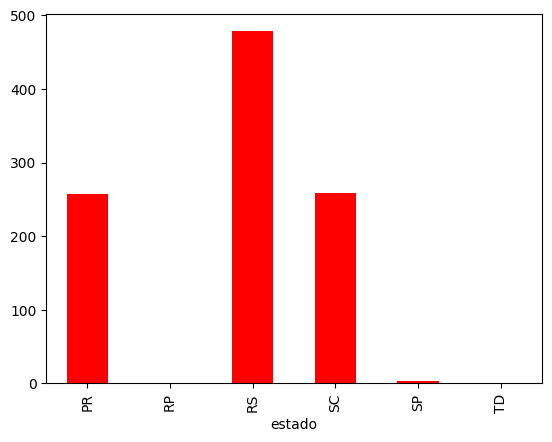

In [114]:
estados.plot.bar(color='red')

In [115]:
generos = data.groupby(['genero']).size()
generos

genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='genero'>

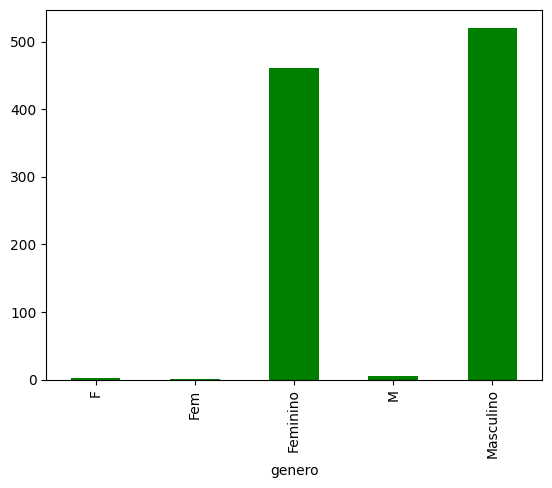

In [116]:
generos.plot.bar(color='green')

In [117]:
data['score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: score, dtype: float64

<Axes: >

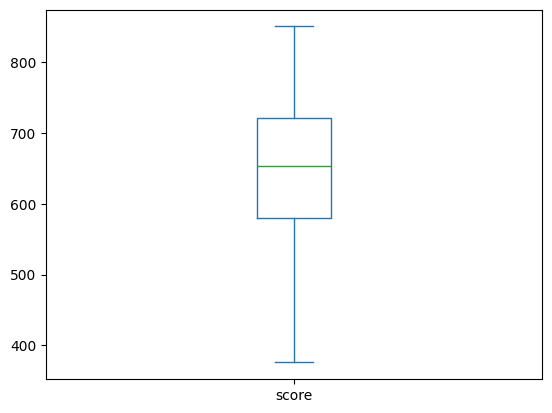

In [118]:
data['score'].plot.box()

<Axes: ylabel='score'>

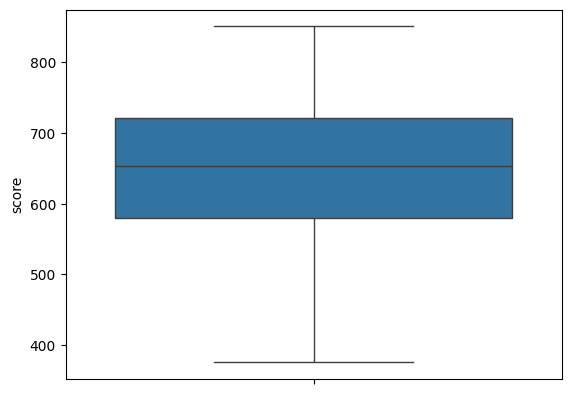

In [119]:
srn.boxplot(data['score'])

<Axes: xlabel='score', ylabel='Count'>

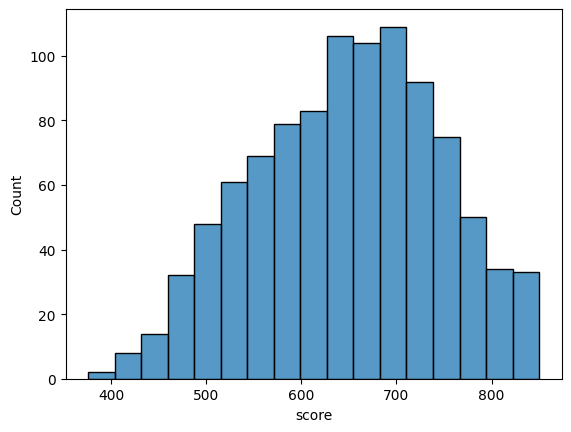

In [120]:
srn.histplot(data['score'])

<Axes: ylabel='Frequency'>

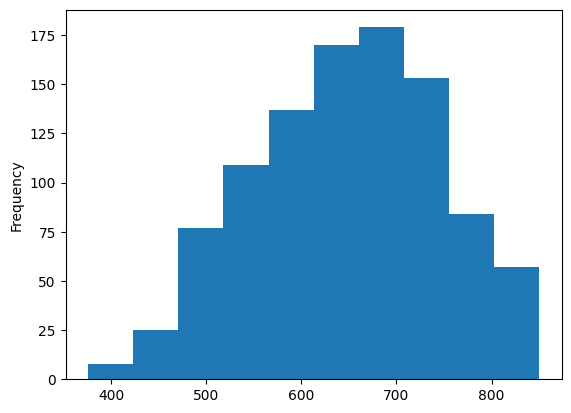

In [121]:
data['score'].plot.hist()

In [122]:
data['idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: idade, dtype: float64

<Axes: ylabel='idade'>

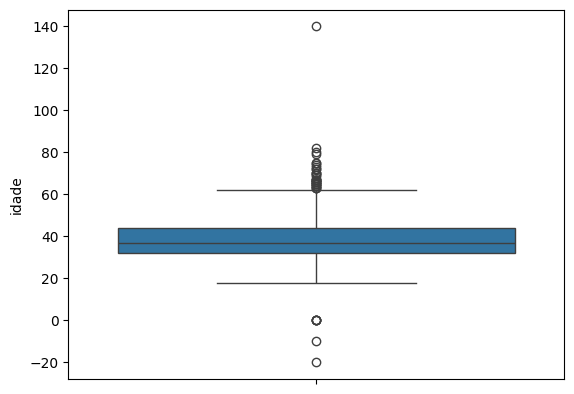

In [123]:
idades = data['idade']
srn.boxplot(idades)

<Axes: xlabel='idade', ylabel='Count'>

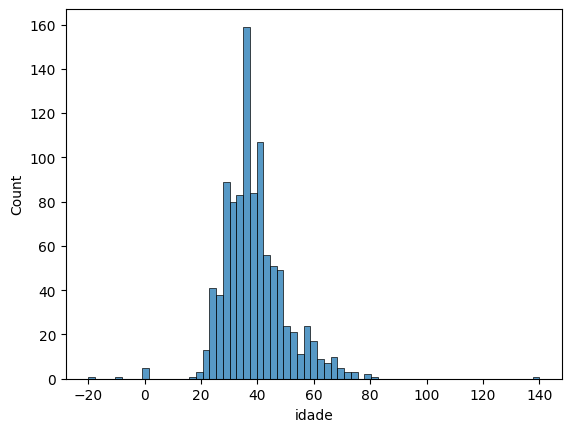

In [124]:
srn.histplot(idades)

In [125]:
saldos = data['saldo']
saldos.describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: saldo, dtype: float64

<Axes: ylabel='saldo'>

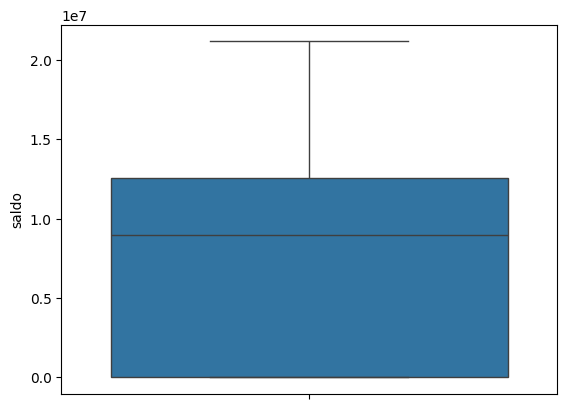

In [126]:
srn.boxplot(saldos)

<Axes: xlabel='saldo', ylabel='Count'>

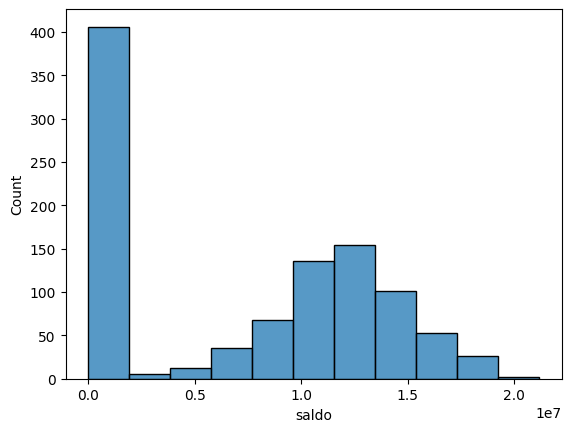

In [127]:
srn.histplot(saldos)

In [128]:
salarios = data['salario']
salarios.describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: salario, dtype: float64

<Axes: ylabel='salario'>

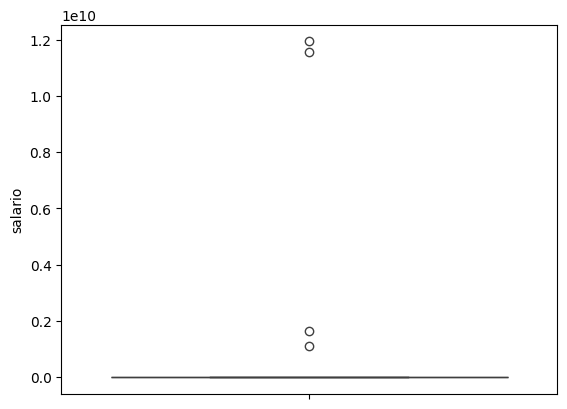

In [129]:
srn.boxplot(salarios)

<Axes: xlabel='salario', ylabel='Count'>

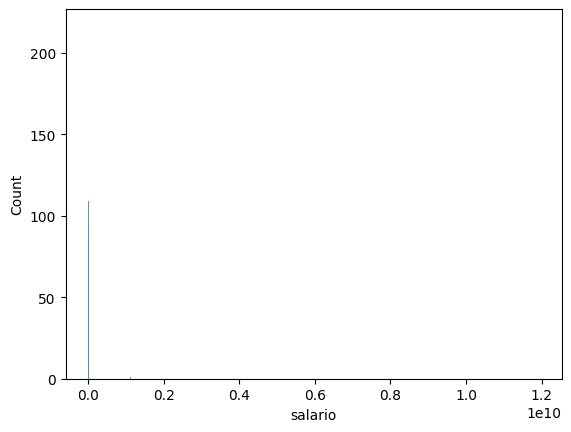

In [130]:
srn.histplot(salarios)

# Tratando dados - Null Values

In [131]:
data.isnull().sum()

id                0
score             0
estado            0
genero            8
idade             0
patrimonio        0
saldo             0
produtos          0
temcardcredito    0
ativo             0
salario           7
saiu              0
dtype: int64

In [132]:
media_salarios = sts.median(salarios)
media_salarios

70518.0

In [133]:
salarios.fillna(media_salarios, inplace=True)
data.isnull().sum()

id                0
score             0
estado            0
genero            8
idade             0
patrimonio        0
saldo             0
produtos          0
temcardcredito    0
ativo             0
salario           0
saiu              0
dtype: int64

In [134]:
generos = data['genero']
generos.describe()

count           991
unique            5
top       Masculino
freq            521
Name: genero, dtype: object

In [135]:
generos.fillna('Masculino', inplace=True)
generos.isnull().sum()

0

In [136]:
generos.unique()

array(['Feminino', 'Masculino', 'M', 'F', 'Fem'], dtype=object)

In [137]:
data.loc[data['genero'] == 'M', 'genero'] = 'Masculino'
data.loc[data['genero'].isin(['F', 'Fem']), 'genero'] = 'Feminino'
generos = data.groupby(['genero']).size()
generos

genero
Feminino     464
Masculino    535
dtype: int64

In [138]:
data['idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: idade, dtype: float64

In [139]:
data.loc[(data['idade'] < 0) | (data['idade'] > 110)]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcardcredito,ativo,salario,saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [140]:
mediana_idade = sts.median(data['idade'])
mediana_idade

37

In [141]:
data.loc[(data['idade'] < 0) | (data['idade'] > 110), 'idade'] = mediana_idade
data.loc[(data['idade'] < 0) | (data['idade'] > 110)]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcardcredito,ativo,salario,saiu


In [142]:
data['idade'].describe()

count    999.000000
mean      38.903904
std       10.672421
min        0.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       82.000000
Name: idade, dtype: float64

<Axes: ylabel='idade'>

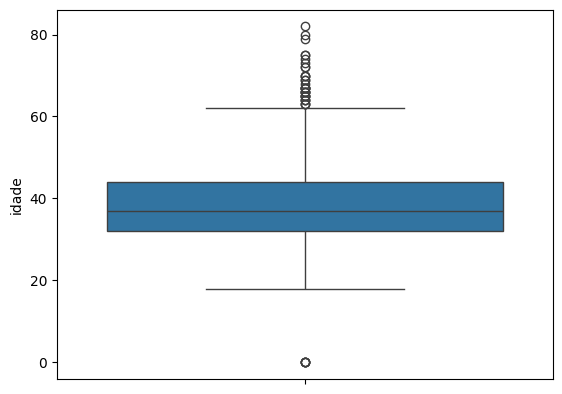

In [143]:
srn.boxplot(data['idade'])

In [144]:
data.loc[(data['idade'] < 0) | (data['idade'] > 110)]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcardcredito,ativo,salario,saiu


# Dados duplicados

In [145]:
data[data.duplicated(['id'], keep=False)]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcardcredito,ativo,salario,saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [146]:
data.drop_duplicates(subset='id', keep='first', inplace=True)
data[data.duplicated(['id'], keep=False)]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcardcredito,ativo,salario,saiu


In [148]:
estados = data.groupby(['estado']).size()
estados

estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [150]:
data.loc[data['estado'].isin(['RP', 'SP', 'TD']), 'estado'] = 'RS'
estados = data.groupby(['estado']).size()
estados

estado
PR    257
RS    483
SC    258
dtype: int64

<Axes: ylabel='salario'>

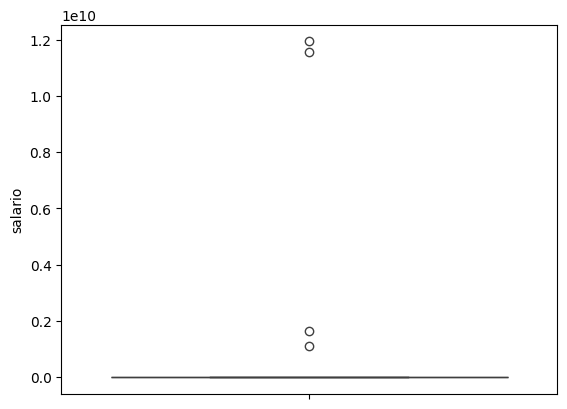

In [151]:
srn.boxplot(data['salario'])

In [153]:
desv = sts.stdev(data['salario'])
desv

528988918.4679201

In [154]:
data.loc[data['salario'] >= 2 * desv]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcardcredito,ativo,salario,saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [156]:
mediana_salario = sts.median(data['salario'])
mediana_salario

8637195.5

In [160]:
data.loc[data['salario'] >= 2 * desv, 'salario'] = mediana_salario
data.loc[data['salario'] >= 2 * desv]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcardcredito,ativo,salario,saiu


In [162]:
data.head()

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcardcredito,ativo,salario,saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [163]:
data.tail()

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcardcredito,ativo,salario,saiu
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0
998,1000,811,PR,Feminino,28,4,16773882,2,1,1,990342.0,0


In [ ]:
data.shape